<a href="https://colab.research.google.com/github/akash-mohandas/Fast-Food-101--Classification-/blob/master/FastAI_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import fastai libraries which has the food-101 dataset and built in models

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

Any edits to the libraries will be reloaded automatically using following lines. Since fastai is developing rapidly, this is helpful.

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Batch size to be used

In [0]:
bs=64

Download and extract food-101 data by passing the URL

In [0]:
path = untar_data(URLs.FOOD)

In [5]:
path.ls()

[PosixPath('/root/.fastai/data/food-101/images'),
 PosixPath('/root/.fastai/data/food-101/train.json'),
 PosixPath('/root/.fastai/data/food-101/test.txt'),
 PosixPath('/root/.fastai/data/food-101/h5'),
 PosixPath('/root/.fastai/data/food-101/train.txt'),
 PosixPath('/root/.fastai/data/food-101/labels.txt'),
 PosixPath('/root/.fastai/data/food-101/test.json'),
 PosixPath('/root/.fastai/data/food-101/classes.txt')]

Import the json file containing the information about training data to be used in the images folder

In [12]:
path_train_img = path/'train.json'
import json
with open(path_train_img) as j_file:
  train_data=json.load(j_file)
for p in train_data:
  print(train_data[p][:2])
j_file.close()
#fnames = get_image_files(path_img)

['churros/1004234', 'churros/1013460']
['hot_and_sour_soup/1002782', 'hot_and_sour_soup/1003688']
['samosa/1008131', 'samosa/1011601']
['sashimi/1001239', 'sashimi/1001363']
['pork_chop/1000802', 'pork_chop/1006233']
['spring_rolls/1002160', 'spring_rolls/1003056']
['panna_cotta/1001332', 'panna_cotta/1003460']
['beef_tartare/1000431', 'beef_tartare/1005746']
['greek_salad/1007149', 'greek_salad/1009138']
['foie_gras/1004944', 'foie_gras/1008577']
['tacos/1002217', 'tacos/1005454']
['pad_thai/1004763', 'pad_thai/1009595']
['poutine/1005364', 'poutine/1019904']
['ramen/1002305', 'ramen/1002843']
['pulled_pork_sandwich/1004064', 'pulled_pork_sandwich/1005662']
['bibimbap/1002297', 'bibimbap/1006709']
['beignets/1000911', 'beignets/1002569']
['apple_pie/1005649', 'apple_pie/1014775']
['crab_cakes/100038', 'crab_cakes/1003375']
['risotto/1004412', 'risotto/1009354']
['paella/1000388', 'paella/1000412']
['steak/1000205', 'steak/100135']
['baby_back_ribs/1005293', 'baby_back_ribs/1007102']
[

Checking if the training data is balanced

In [7]:
for labels in train_data:
  print(labels,len(train_data[labels]))

churros 750
hot_and_sour_soup 750
samosa 750
sashimi 750
pork_chop 750
spring_rolls 750
panna_cotta 750
beef_tartare 750
greek_salad 750
foie_gras 750
tacos 750
pad_thai 750
poutine 750
ramen 750
pulled_pork_sandwich 750
bibimbap 750
beignets 750
apple_pie 750
crab_cakes 750
risotto 750
paella 750
steak 750
baby_back_ribs 750
miso_soup 750
frozen_yogurt 750
club_sandwich 750
carrot_cake 750
falafel 750
bread_pudding 750
chicken_wings 750
gnocchi 750
caprese_salad 750
creme_brulee 750
escargots 750
chocolate_cake 750
tiramisu 750
spaghetti_bolognese 750
mussels 750
scallops 750
baklava 750
edamame 750
macaroni_and_cheese 750
pancakes 750
garlic_bread 750
beet_salad 750
onion_rings 750
red_velvet_cake 750
grilled_salmon 750
chicken_curry 750
deviled_eggs 750
caesar_salad 750
hummus 750
fish_and_chips 750
lasagna 750
peking_duck 750
guacamole 750
strawberry_shortcake 750
clam_chowder 750
croque_madame 750
french_onion_soup 750
beef_carpaccio 750
fried_rice 750
donuts 750
gyoza 750
ravioli

Get train data path

In [0]:
path_img = path/'images/'
train_images=[]
labels=[]
for food in train_data:
  for img in train_data[food]:
    train_images.append(path_img/(img+'.jpg'))
    labels.append(img[:img.rfind('/')])
    


Get test data path

In [0]:
path_test_img = path/'test.json'
with open(path_test_img) as j_file1:
  test_data=json.load(j_file1)
  
j_file1.close()
path_img = path/'images/'
test_images=[]
test_labels=[]
for food in test_data:
  for img in test_data[food]:
    test_images.append(path_img/(img+'.jpg'))
    test_labels.append(img[:img.rfind('/')])

Create a dataframe for train and test paths

In [0]:
import pandas as pd
train_df = pd.DataFrame()
train_df["column1"]=train_images
train_df["label"]=labels


test_df = pd.DataFrame()
test_df["column1"]=test_images
test_df["label"]=test_labels


Create an image data bunch for train and test

In [0]:

data = (ImageList.from_df(train_df,Path('/')).split_by_rand_pct(0.2)
       .label_from_df().transform(get_transforms(),size=224)
        .databunch(bs=bs//2).normalize(imagenet_stats))
test = ImageList.from_df(test_df, Path('/'))
data.add_test(test)

In [14]:
data.sanity_check

<bound method DataBunch.sanity_check of ImageDataBunch;

Train: LabelList (60600 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
churros,churros,churros,churros,churros
Path: /;

Valid: LabelList (15150 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
fried_rice,paella,hot_dog,cannoli,ramen
Path: /;

Test: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: />

In [0]:
train_data = ImageDataBunch.from_lists(path_img,train_images,ds_tfms=get_transforms(),labels=labels,size=224,bs=bs//2).normalize(imagenet_stats)


Lets look how the training data looks like

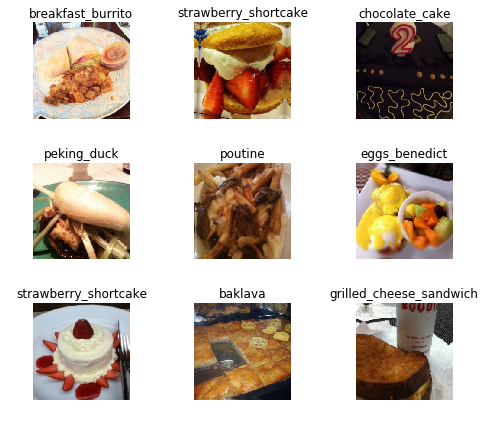

In [9]:


train_data.show_batch(rows=3, figsize=(7,6))

In [10]:
print(train_data.classes)


['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

Lets use the architecture of RESNET50 which is famous for Image classification

In [0]:
learner = cnn_learner(data,models.resnet50,metrics=accuracy)

In [28]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (downsample): Sequential(
          (0): Conv2d(64, 256, kernel_s

Find the loss vs learning rate for first epoch and choose the best learning rate

In [66]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


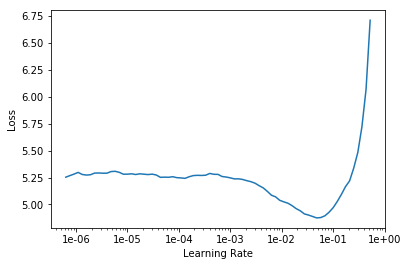

In [67]:
learner.recorder.plot()

train the model for 17 epochs as it overfits there after

In [0]:
learner.fit_one_cycle(17,max_lr=slice(1e-2,1e-1))

In [0]:
  learner.save('/content/gdrive/My Drive/Resnet50-epoch17-err0.2326')

Load the model saved on google drive as the kernel keeps dying. This model is trained with RESNET50 for 17 epochs and has training error rate of 0.2326

In [0]:
learner = cnn_learner(data,models.resnet50).load('/content/gdrive/My Drive/Resnet50-epoch17-err0.2326')

Geth the predictions for test data

In [0]:
preds = learner.get_preds(data.test_ds)

The model gives 68.99% accuracy on test data

In [55]:
acc=0
labels=sorted(list(set(test_labels)))
len(labels)
for i in range(len(test_labels)):
  if labels[preds[1][i]]==test_labels[i]:
    acc+=1
print(acc/len(test_labels))



0.689980198019


In [12]:
learner = cnn_learner(train_data,models.resnet50).load('/content/gdrive/My Drive/Resnet50-epoch17-err0.2326')

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 73209985.64it/s]


Interpretation of learner

In [0]:
interp = ClassificationInterpretation.from_learner(learner)


What are the top misclassified foods among the training data

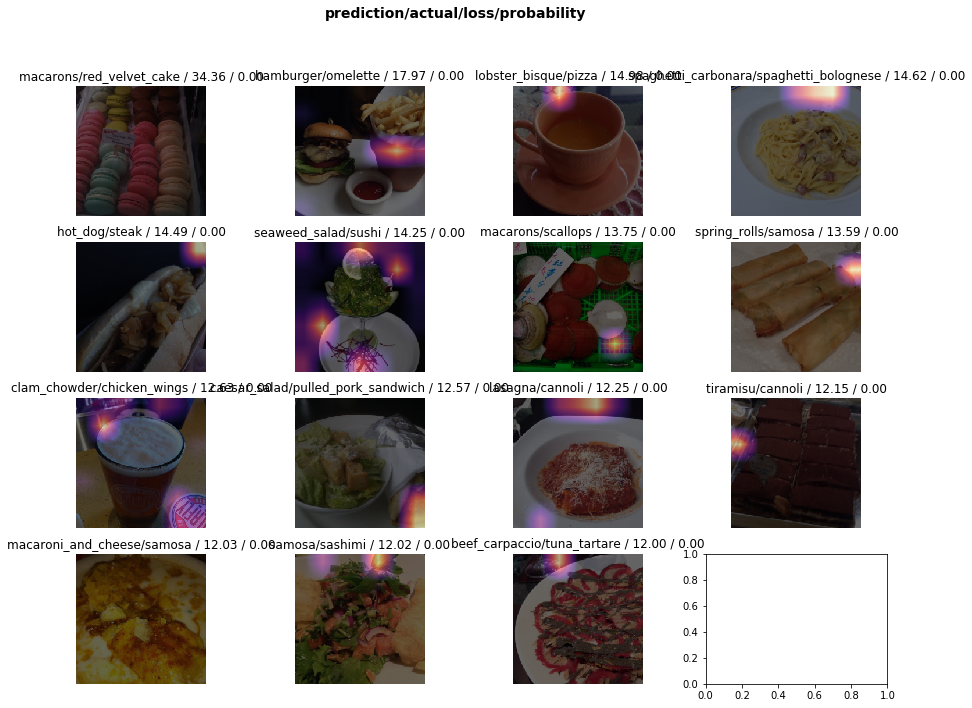

In [37]:
interp.plot_top_losses(15,figsize=(15,11))